<a href="https://colab.research.google.com/github/SOWMIYA-BALACHANDAR/PRASUNET-MACHINE-LEARNING/blob/main/ML_TASK_3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPLEMENTATION OF A SUPPORT VECTOR MACHINE (SVM) TO CLASSIFY IMAGES OF CATS AND DOGS FROM THE KAGGLE DATASET**

**Mount Google Drive**

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Define Paths**

In [52]:
train_dir = '/content/drive/MyDrive/prasunet task/train 1'
test_dir = '/content/drive/MyDrive/prasunet task/test'

**Reading and Exploring the data**

In [54]:
train_cats_dir[:5]

['/content/drive/MyDrive/prasunet task/train 1/cat.10.jpg',
 '/content/drive/MyDrive/prasunet task/train 1/cat.1.jpg',
 '/content/drive/MyDrive/prasunet task/train 1/cat.0.jpg',
 '/content/drive/MyDrive/prasunet task/train 1/cat.100.jpg',
 '/content/drive/MyDrive/prasunet task/train 1/cat.11.jpg']

In [55]:
train_dogs_dir[:5]

['/content/drive/MyDrive/prasunet task/train 1/dog.4309.jpg',
 '/content/drive/MyDrive/prasunet task/train 1/dog.4315.jpg',
 '/content/drive/MyDrive/prasunet task/train 1/dog.4307.jpg',
 '/content/drive/MyDrive/prasunet task/train 1/dog.4306.jpg',
 '/content/drive/MyDrive/prasunet task/train 1/dog.4301.jpg']

In [56]:
dataset.head()

,image_path,target
0,/content/drive/MyDrive/prasunet task/train 1/c...,cat
1,/content/drive/MyDrive/prasunet task/train 1/c...,cat
2,/content/drive/MyDrive/prasunet task/train 1/c...,cat
3,/content/drive/MyDrive/prasunet task/train 1/c...,cat
4,/content/drive/MyDrive/prasunet task/train 1/c...,cat


In [57]:
dataset.tail()

,image_path,target
360,/content/drive/MyDrive/prasunet task/train 1/d...,dog
361,/content/drive/MyDrive/prasunet task/train 1/d...,dog
362,/content/drive/MyDrive/prasunet task/train 1/d...,dog
363,/content/drive/MyDrive/prasunet task/train 1/d...,dog
364,/content/drive/MyDrive/prasunet task/train 1/d...,dog


In [58]:
len(dataset)

365

In [59]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 365
target
cat    209
dog    156
Name: count, dtype: int64


**Helper Function to Preprocess Images**

In [60]:
import cv2
import numpy as np

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    image = cv2.resize(image, (64, 64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.flatten()
    image = image / 255.0
    return image



**Load and Preprocess Images**

---



In [61]:
import os

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            label = 0 if 'cat' in filename else 1
            try:
                img = preprocess_image(os.path.join(folder, filename))
                images.append(img)
                labels.append(label)
            except ValueError as e:
                print(e)
    return np.array(images), np.array(labels)


**Load Training Data**

In [62]:
# Load training data
X_train, y_train = load_images_from_folder(train_dir)
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")


Training data shape: (365, 4096), Labels shape: (365,)


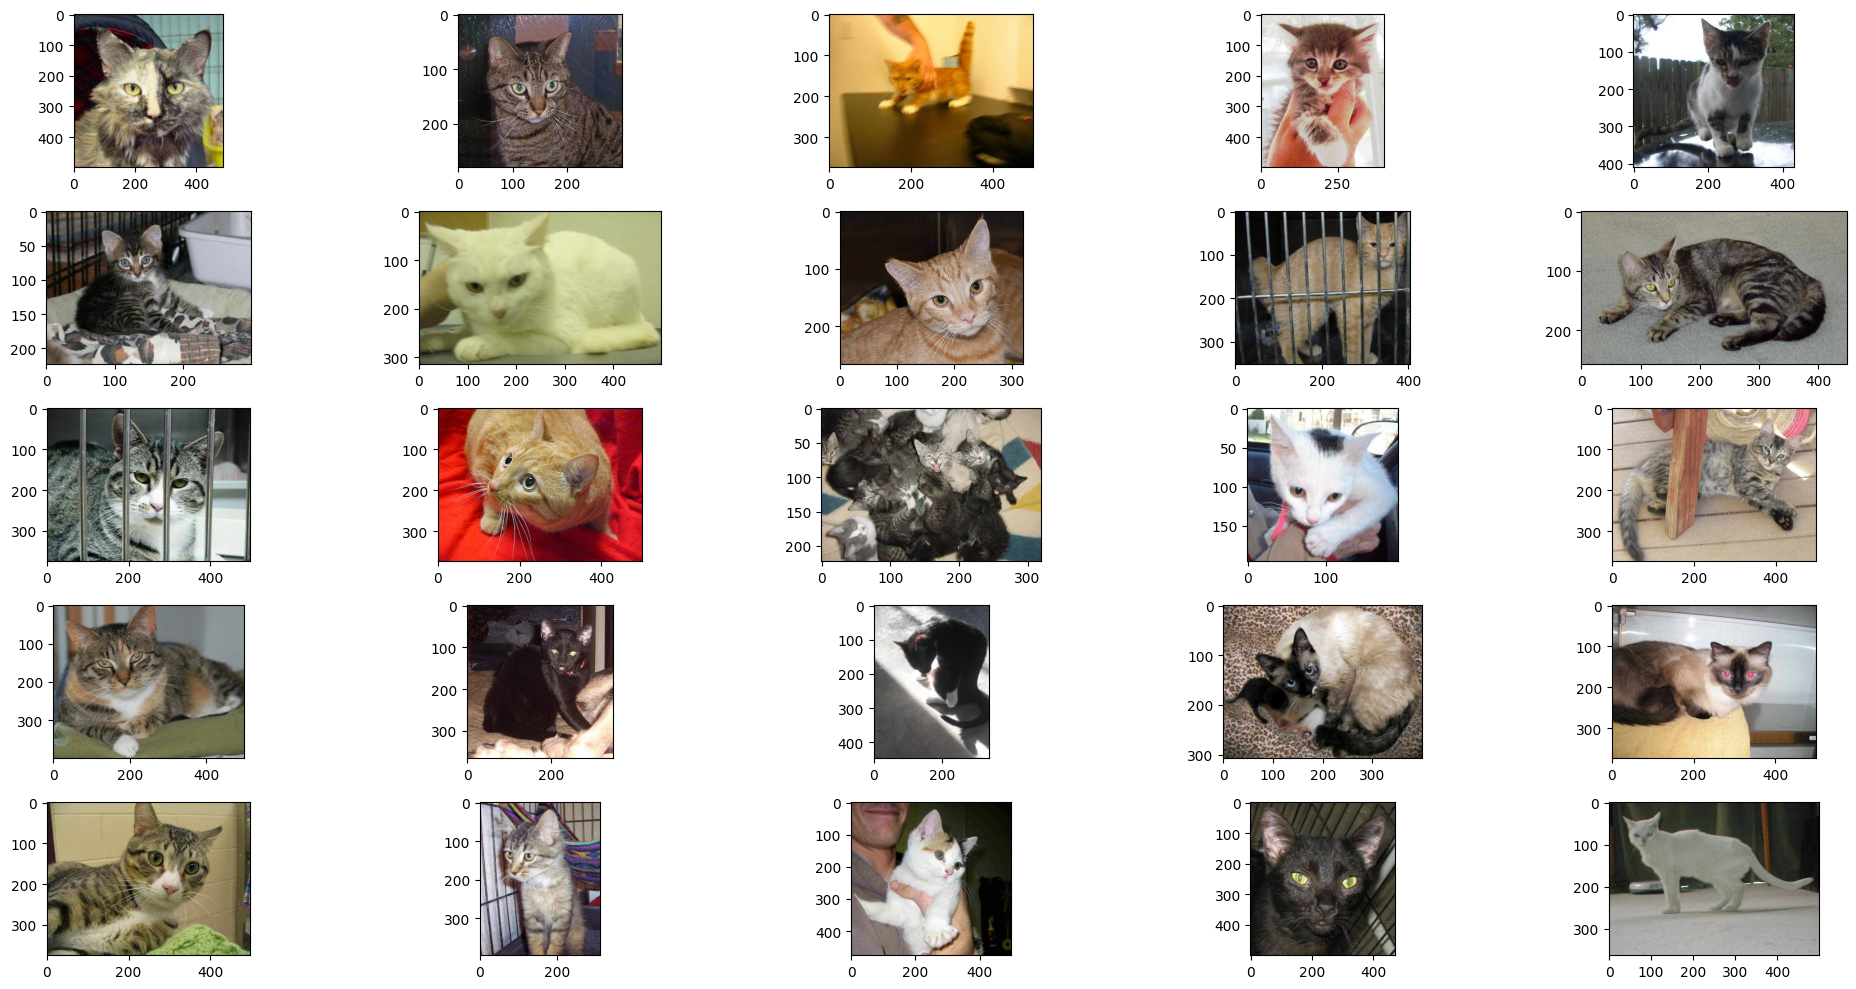

In [ ]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = mpimg.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1

fig.tight_layout()
plt.show()

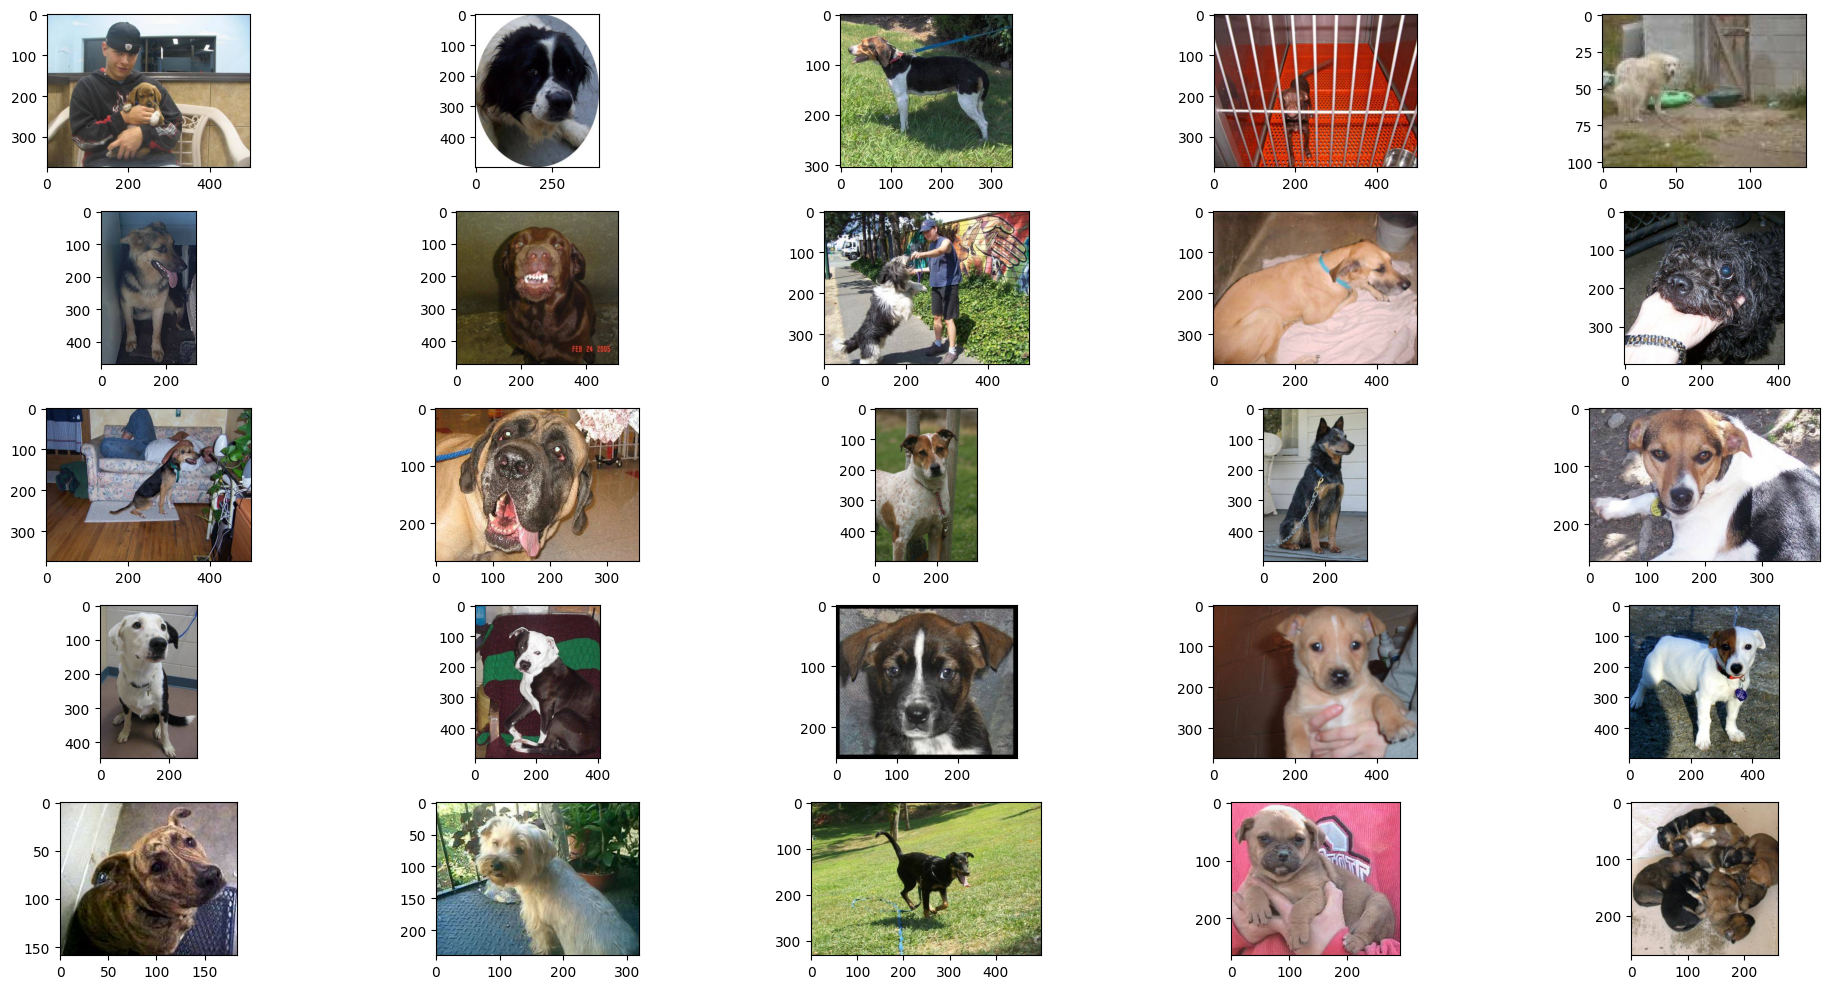

In [ ]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = mpimg.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1

fig.tight_layout()
plt.show()

**Load Test Data**

In [63]:
# Load test data
test_images = [os.path.join(test_dir, filename) for filename in os.listdir(test_dir) if filename.endswith('.jpg')]
X_test = []
test_filenames = []
for image_path in test_images:
    try:
        img = preprocess_image(image_path)
        X_test.append(img)
        test_filenames.append(os.path.basename(image_path))
    except ValueError as e:
        print(e)
X_test = np.array(X_test)
print(f"Test data shape: {X_test.shape}")


Test data shape: (72, 4096)


**PCA for Dimensionality Reduction**

In [64]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Training data shape after PCA: {X_train_pca.shape}")
print(f"Test data shape after PCA: {X_test_pca.shape}")


Training data shape after PCA: (365, 50)
Test data shape after PCA: (72, 50)


**Train SVM Classifier**

In [65]:
from sklearn.svm import SVC

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train)


SVC(kernel='linear')

**Predict on Test Data**

In [66]:
# Predict on the test data
y_test_pred = svm_classifier.predict(X_test_pca)


**Generate Output File**

In [68]:
import pandas as pd
output_df = pd.DataFrame({'id': test_filenames, 'label': y_test_pred})
print(output_df)
output_df.to_csv('/content/drive/MyDrive/prasunet task/test_predictions.csv', index=False)



        id  label
0    1.jpg      0
1   10.jpg      0
2   11.jpg      0
3   12.jpg      0
4   13.jpg      0
..     ...    ...
67   7.jpg      0
68  71.jpg      0
69  72.jpg      1
70   8.jpg      0
71   9.jpg      0

[72 rows x 2 columns]
